In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from matplotlib import pyplot
from mlflow import log_metric, log_param, log_artifacts
import mlflow
import mlflow.sklearn

from pprint import pprint

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


from sklearn.preprocessing import PolynomialFeatures



# lectura, limpieza y procesamiento de datos.
# Creación de new features como nombre del día y mes, eliminación de casual y registered (por alta correlación) con cnt y  usar cnt como variable objetivo, onehot para variables categoricas y se escalan las variables númericas.

In [2]:

patinetas_df = pd.read_csv('Data_Taller_2.csv', sep = ';')
patinetas_df.head(100)

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,1/01/2020,Springer,No,Mist + Cloudy,"8,175849","9,090375","0,805833","10,749882",331,654,985
1,2,2/01/2020,Springer,No,Mist + Cloudy,"9,083466","8,625733","0,696087","-16,652113",131,670,801
2,3,3/01/2020,Springer,No,Few clouds,"1,229108","0,902035","0,437273","16,636703",120,1229,1349
3,4,4/01/2020,Springer,No,Few clouds,"1,4","1,969734","0,590435","10,739832",108,1454,1562
4,5,5/01/2020,Springer,No,Partly cloudy,"2,666979","2,77569","0,436957","12,5223",82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,6/04/2020,Summer,No,Partly cloudy,"10,369151","10,217576","0,470833","17,625221",413,2395,2808
96,97,7/04/2020,Summer,No,Clear,"12,5625","12,383712","0,602917","10,874904",571,2570,3141
97,98,8/04/2020,Summer,No,Mist + Broken clouds,"7,784151","7,250513","0,83625","15,208464",172,1299,1471
98,99,9/04/2020,Summer,No,Mist + Few clouds,"8,0975","8,051863","0,8775","8,916561",879,1576,2455


In [54]:
profile_new = ProfileReport(patinetas_df)
profile_new.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
patinetas_df.isnull().sum()

instant       0
Date          0
Season        0
Holiday       0
Weather       0
Temp          4
Feel_Temp     0
Hum           0
Wind          0
Casual        0
Registered    0
cnt           0
dtype: int64

In [14]:
len(patinetas_df.dropna())

727

In [24]:
patinetas_df.dtypes

instant        int64
Date          object
Season        object
Holiday       object
Weather       object
Temp          object
Feel_Temp     object
Hum           object
Wind          object
Casual         int64
Registered     int64
cnt            int64
dtype: object

In [3]:
patinetas_df['Date'] = pd.to_datetime(patinetas_df['Date'],format='%d/%m/%Y', errors='coerce')
patinetas_df

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,2020-01-01,Springer,No,Mist + Cloudy,"8,175849","9,090375","0,805833","10,749882",331,654,985
1,2,2020-01-02,Springer,No,Mist + Cloudy,"9,083466","8,625733","0,696087","-16,652113",131,670,801
2,3,2020-01-03,Springer,No,Few clouds,"1,229108","0,902035","0,437273","16,636703",120,1229,1349
3,4,2020-01-04,Springer,No,Few clouds,"1,4","1,969734","0,590435","10,739832",108,1454,1562
4,5,2020-01-05,Springer,No,Partly cloudy,"2,666979","2,77569","0,436957","12,5223",82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2021-12-27,Springer,No,Mist + Cloudy,"3,945849","2,652174","0,652917","23,458911",247,1867,2114
727,728,2021-12-28,Springer,No,Mist + Few clouds,"3,906651","3,987162","0,59","10,416557",644,2451,3095
728,729,2021-12-29,Springer,No,Mist,"3,906651","3,3928","0,752917","8,333661",159,1182,1341
729,730,2021-12-30,Springer,No,Few clouds,"4,024151","2,8899","0,483333","23,500518",364,1432,1796


In [4]:

patinetas_df['Day'] = patinetas_df.Date.dt.day_name()
patinetas_df['month'] = patinetas_df.Date.dt.month_name()
patinetas_df = patinetas_df.drop(['Date'], axis = 1).dropna()
patinetas_df

,instant,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Day,month
0,1,Springer,No,Mist + Cloudy,"8,175849","9,090375","0,805833","10,749882",331,654,985,Wednesday,January
1,2,Springer,No,Mist + Cloudy,"9,083466","8,625733","0,696087","-16,652113",131,670,801,Thursday,January
2,3,Springer,No,Few clouds,"1,229108","0,902035","0,437273","16,636703",120,1229,1349,Friday,January
3,4,Springer,No,Few clouds,"1,4","1,969734","0,590435","10,739832",108,1454,1562,Saturday,January
4,5,Springer,No,Partly cloudy,"2,666979","2,77569","0,436957","12,5223",82,1518,1600,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,Springer,No,Mist + Cloudy,"3,945849","2,652174","0,652917","23,458911",247,1867,2114,Monday,December
727,728,Springer,No,Mist + Few clouds,"3,906651","3,987162","0,59","10,416557",644,2451,3095,Tuesday,December
728,729,Springer,No,Mist,"3,906651","3,3928","0,752917","8,333661",159,1182,1341,Wednesday,December
729,730,Springer,No,Few clouds,"4,024151","2,8899","0,483333","23,500518",364,1432,1796,Thursday,December


In [5]:
patinetas_df[patinetas_df['month'].isnull()]

,instant,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Day,month


## variables binarias

In [6]:
patinetas_df_c = patinetas_df.replace(to_replace=['No','Yes'], value = [0,1])
patinetas_df_c.head()

,instant,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Day,month
0,1,Springer,0,Mist + Cloudy,"8,175849","9,090375","0,805833","10,749882",331,654,985,Wednesday,January
1,2,Springer,0,Mist + Cloudy,"9,083466","8,625733","0,696087","-16,652113",131,670,801,Thursday,January
2,3,Springer,0,Few clouds,"1,229108","0,902035","0,437273","16,636703",120,1229,1349,Friday,January
3,4,Springer,0,Few clouds,"1,4","1,969734","0,590435","10,739832",108,1454,1562,Saturday,January
4,5,Springer,0,Partly cloudy,"2,666979","2,77569","0,436957","12,5223",82,1518,1600,Sunday,January


## Escalar variables

In [34]:
patinetas_df_c.dtypes

instant                int64
Date          datetime64[ns]
Season                object
Holiday               object
Weather               object
Temp                 float64
Feel_Temp             object
Hum                   object
Wind                  object
Casual                 int64
Registered             int64
cnt                    int64
Day                   object
month                 object
Teamp                float64
dtype: object

In [13]:
patinetas_df_c['Temp'] = patinetas_df['Temp'].str.replace(',','.',regex=False).astype(float)
patinetas_df_c['Feel_Temp'] = patinetas_df['Feel_Temp'].str.replace(',','.',regex=False).astype(float)
patinetas_df_c['Hum'] = patinetas_df['Hum'].str.replace(',','.',regex=False).astype(float)
patinetas_df_c['Wind'] = patinetas_df['Wind'].str.replace(',','.',regex=False).astype(float)
patinetas_df_c.head(1)

,instant,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Day,month
0,1,Springer,0,Mist + Cloudy,8.175849,9.090375,0.805833,10.749882,331,654,985,Wednesday,January


In [8]:
scaled_features = patinetas_df_c.copy()

In [9]:
#col_names = ['Season', 'Weather','Day','month']
col_names = ['Temp', 'Feel_Temp','Hum','Wind','Casual']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head()

,instant,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Day,month
0,1,Springer,0,Mist + Cloudy,-0.826935,-0.680433,0.207641,-0.352019,-0.754631,654,985,Wednesday,January
1,2,Springer,0,Mist + Cloudy,-0.721299,-0.741203,0.041282,-5.424010,-1.045639,670,801,Thursday,January
2,3,Springer,0,Few clouds,-1.635454,-1.751366,-0.351041,0.737607,-1.061645,1229,1349,Friday,January
3,4,Springer,0,Few clouds,-1.615564,-1.611725,-0.118870,-0.353879,-1.079105,1454,1562,Saturday,January
4,5,Springer,0,Partly cloudy,-1.468103,-1.506316,-0.351520,-0.023952,-1.116936,1518,1600,Sunday,January


In [51]:
len(scaled_features)

731

## one hopt enc y remplazar los 4 datos nulos en temperatura por la temperatura promedio.

In [10]:
ohe_weather = OneHotEncoder()
ohe_day = OneHotEncoder()
ohe_month = OneHotEncoder()
ohe_season = OneHotEncoder()

transformed_weather = ohe_weather.fit_transform(scaled_features[['Weather']])
scaled_features[ohe_weather.categories_[0]] = transformed_weather.toarray()

transformed_day = ohe_day.fit_transform(scaled_features[['Day']])
scaled_features[ohe_day.categories_[0]] = transformed_day.toarray()

transformed_month = ohe_month.fit_transform(scaled_features[['month']])
scaled_features[ohe_month.categories_[0]] = transformed_month.toarray()



transformed_season = ohe_season.fit_transform(scaled_features[['Season']])
scaled_features[ohe_season.categories_[0]] = transformed_season.toarray()

In [29]:
final_df['Temp'].fillna(value=mean_value)

0     -0.825980
1     -0.720321
2     -1.634676
3     -1.614782
4     -1.467289
         ...   
726   -1.318410
727   -1.322974
728   -1.322974
729   -1.309295
730   -1.528153
Name: Temp, Length: 731, dtype: float64

In [11]:
mean_value=scaled_features['Temp'].mean()
final_df = scaled_features.drop(['instant','Casual','Registered','Day','month','Weather','Season'],axis=1)#.fillna(value=mean_value, inplace=True)
final_df['Temp'] = final_df['Temp'].fillna(value=mean_value).dropna()
final_df

,Holiday,Temp,Feel_Temp,Hum,Wind,cnt,Partly cloudy,Partly cloudy,Clear,Few clouds,...,June,March,May,November,October,September,Fall,Springer,Summer,Winter
0,0,-0.826935,-0.680433,0.207641,-0.352019,985,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,-0.721299,-0.741203,0.041282,-5.424010,801,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,-1.635454,-1.751366,-0.351041,0.737607,1349,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,-1.615564,-1.611725,-0.118870,-0.353879,1562,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,-1.468103,-1.506316,-0.351520,-0.023952,1600,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,-1.319258,-1.522470,-0.024157,2.000368,2114,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,0,-1.323820,-1.347870,-0.119530,-0.413716,3095,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
728,0,-1.323820,-1.425605,0.127428,-0.799251,1341,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
729,0,-1.310144,-1.491378,-0.281221,2.008069,1796,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
final_df.columns

Index([                      'Holiday',                          'Temp',
                           'Feel_Temp',                           'Hum',
                                'Wind',                           'cnt',
                   ' Partly    cloudy',                ' Partly cloudy',
                               'Clear',                    'Few clouds',
       'Light Rain + Scattered clouds',                          'Mist',
                'Mist + Broken clouds',                 'Mist + Cloudy',
                   'Mist + Few clouds',           'Rain + Thunderstorm',
                                'Snow',                        'Friday',
                              'Monday',                      'Saturday',
                              'Sunday',                      'Thursday',
                             'Tuesday',                     'Wednesday',
                                   nan,                         'April',
                              'August',            

# Entrenamiento

In [12]:

#from utils import fetch_logged_data

def yield_artifacts(run_id, path=None):
    """Yield all artifacts in the specified run"""
    client = mlflow.tracking.MlflowClient()
    for item in client.list_artifacts(run_id, path):
        if item.is_dir:
            yield from yield_artifacts(run_id, item.path)
        else:
            yield item.path


def fetch_logged_data(run_id):
    """Fetch params, metrics, tags, and artifacts in the specified run"""
    client = mlflow.tracking.MlflowClient()
    data = client.get_run(run_id).data
    # Exclude system tags: https://www.mlflow.org/docs/latest/tracking.html#system-tags
    tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
    artifacts = list(yield_artifacts(run_id))
    return {
        "params": data.params,
        "metrics": data.metrics,
        "tags": tags,
        "artifacts": artifacts,
    }


## Split datos entrenamiento

In [14]:
Y = final_df['cnt']
X = final_df.drop('cnt', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Linear Regression

In [22]:
def main():
    mlflow.set_experiment(experiment_name="Taller-2")
    mlflow.sklearn.autolog()

    
    parameters = {'n_jobs':[-1]}
    
    lr = LinearRegression()
    clf = GridSearchCV(lr, parameters, cv = 5,verbose=2)

    clf.fit(X_train.values, Y_train.values)
    run_id = mlflow.last_active_run().info.run_id

    print("========== parent run ==========")
    for key, data in fetch_logged_data(run_id).items():
        print("\n---------- logged {} ----------".format(key))
        pprint(data)
     
    filter_child_runs = "tags.mlflow.parentRunId = '{}'".format(run_id)
    runs = mlflow.search_runs(filter_string=filter_child_runs)
    param_cols = ["params.{}".format(p) for p in parameters.keys()]
    metric_cols = ["metrics.mean_test_score"]

    print("\n========== child runs ==========\n")
    pd.set_option("display.max_columns", None)  # prevent truncating columns
    print(runs[["run_id", *param_cols, *metric_cols]])
    
    with mlflow.start_run(run_id=run_id) as run:
        #Metricas del mejor modelo obtenido
        print('---TEST_METRICS----')
        y_pred = clf.predict(X_test.values)
        y_true = Y_test.values
        print(y_pred)
        print(y_true)
        mae = mean_absolute_error(y_true, y_pred)
        log_metric("test_mean_absolute_error", mae)
        print('test_mean_absolute_error '+str(mae))
        r2 = r2_score(y_true, y_pred)
        log_metric("test_r2", r2)
        print('r2 '+str(r2))
        
    
           
    
if __name__ == "__main__":
    main()

2022/10/03 07:57:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b55ba3ffaed043b09d3c8c4e2ce1109b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................................n_jobs=-1; total time=   0.0s
[CV] END ..........................................n_jobs=-1; total time=   0.0s
[CV] END ..........................................n_jobs=-1; total time=   0.0s
[CV] END ..........................................n_jobs=-1; total time=   0.0s
[CV] END ..........................................n_jobs=-1; total time=   0.0s


2022/10/03 07:57:31 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


========== parent run ==========

---------- logged params ----------
{'best_n_jobs': '-1',
 'cv': '5',
 'error_score': 'nan',
 'estimator': 'LinearRegression()',
 'n_jobs': 'None',
 'param_grid': "{'n_jobs': [-1]}",
 'pre_dispatch': '2*n_jobs',
 'refit': 'True',
 'return_train_score': 'False',
 'scoring': 'None',
 'verbose': '2'}

---------- logged metrics ----------
{'best_cv_score': 0.4828718842525689,
 'training_mae': 1127.2844827586207,
 'training_mse': 1680179.9221982758,
 'training_r2_score': 0.5616216983653325,
 'training_rmse': 1296.2175443181889,
 'training_score': 0.5616216983653325}

---------- logged tags ----------
{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

---------- logged artifacts ----------
['best_estimator/MLmodel',
 'best_estimator/conda.yaml',
 'best_estimator/model.pkl',
 'best_estimator/python_env.yaml',
 'best_estimator/requirements.txt',
 'cv_results.csv',
 'model/MLmodel',
 'model/conda.yaml',
 'mod

## RIDGE

In [14]:
def main():
    mlflow.set_experiment(experiment_name="Taller-2")
    mlflow.sklearn.autolog()

    
    parameters = {'alpha':[1.0,0.1,0.5]}
    
    lr = Ridge()
    clf = GridSearchCV(lr, parameters, cv = 5,verbose=2)

    clf.fit(X_train.values, Y_train.values)
    run_id = mlflow.last_active_run().info.run_id

    print("========== parent run ==========")
    for key, data in fetch_logged_data(run_id).items():
        print("\n---------- logged {} ----------".format(key))
        pprint(data)
     
    filter_child_runs = "tags.mlflow.parentRunId = '{}'".format(run_id)
    runs = mlflow.search_runs(filter_string=filter_child_runs)
    param_cols = ["params.{}".format(p) for p in parameters.keys()]
    metric_cols = ["metrics.mean_test_score"]

    print("\n========== child runs ==========\n")
    pd.set_option("display.max_columns", None)  # prevent truncating columns
    print(runs[["run_id", *param_cols, *metric_cols]])
    
    with mlflow.start_run(run_id=run_id) as run:
        #Metricas del mejor modelo obtenido
        print('---TEST_METRICS----')
        y_pred = clf.predict(X_test.values)
        y_true = Y_test.values
        print(y_pred)
        print(y_true)
        mae = mean_absolute_error(y_true, y_pred)
        log_metric("test_mean_absolute_error", mae)
        print('test_mean_absolute_error '+str(mae))
        r2 = r2_score(y_true, y_pred)
        log_metric("test_r2", r2)
        print('r2 '+str(r2))
        
    
           
    
if __name__ == "__main__":
    main()

2022/10/03 07:21:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6300906f198a4e8c927b697d27b823c0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ........................................

2022/10/03 07:22:02 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


========== parent run ==========

---------- logged params ----------
{'best_alpha': '1.0',
 'cv': '5',
 'error_score': 'nan',
 'estimator': 'Ridge()',
 'n_jobs': 'None',
 'param_grid': "{'alpha': [1.0, 0.1, 0.5]}",
 'pre_dispatch': '2*n_jobs',
 'refit': 'True',
 'return_train_score': 'False',
 'scoring': 'None',
 'verbose': '2'}

---------- logged metrics ----------
{'best_cv_score': 0.47536627244275775,
 'training_mae': 1095.830068337192,
 'training_mse': 1589614.675911202,
 'training_r2_score': 0.5663545832653533,
 'training_rmse': 1260.799221093986,
 'training_score': 0.5663545832653533}

---------- logged tags ----------
{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

---------- logged artifacts ----------
['best_estimator/MLmodel',
 'best_estimator/conda.yaml',
 'best_estimator/model.pkl',
 'best_estimator/python_env.yaml',
 'best_estimator/requirements.txt',
 'cv_results.csv',
 'model/MLmodel',
 'model/conda.yaml',
 'model/

## SGDRegressor

In [19]:
def main():
    mlflow.set_experiment(experiment_name="Taller-2")
    mlflow.sklearn.autolog()

    
    parameters = {'alpha':[0.001,0.01,0.1,0.5],'penalty':['l1','l2','elasticnet']}
    
    lr = SGDRegressor()
    clf = GridSearchCV(lr, parameters, cv = 5,verbose=2)

    clf.fit(X_train.values, Y_train.values)
    run_id = mlflow.last_active_run().info.run_id

    print("========== parent run ==========")
    for key, data in fetch_logged_data(run_id).items():
        print("\n---------- logged {} ----------".format(key))
        pprint(data)
     
    filter_child_runs = "tags.mlflow.parentRunId = '{}'".format(run_id)
    runs = mlflow.search_runs(filter_string=filter_child_runs)
    param_cols = ["params.{}".format(p) for p in parameters.keys()]
    metric_cols = ["metrics.mean_test_score"]

    print("\n========== child runs ==========\n")
    pd.set_option("display.max_columns", None)  # prevent truncating columns
    print(runs[["run_id", *param_cols, *metric_cols]])
    
    with mlflow.start_run(run_id=run_id) as run:
        #Metricas del mejor modelo obtenido
        print('---TEST_METRICS----')
        y_pred = clf.predict(X_test.values)
        y_true = Y_test.values
        print(y_pred)
        print(y_true)
        mae = mean_absolute_error(y_true, y_pred)
        log_metric("test_mean_absolute_error", mae)
        print('test_mean_absolute_error '+str(mae))
        r2 = r2_score(y_true, y_pred)
        log_metric("test_r2", r2)
        print('r2 '+str(r2))
        
    
           
    
if __name__ == "__main__":
    main()

2022/10/03 07:56:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '63384c2555404ec5a89d73ab546b906f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.1s
[CV] END ....................alpha=0.001, penalty=elasticnet; total time=   0.1s
[CV] END ....................alpha=0.001, penalt

2022/10/03 07:56:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.


========== parent run ==========

---------- logged params ----------
{'best_alpha': '0.001',
 'best_penalty': 'l2',
 'cv': '5',
 'error_score': 'nan',
 'estimator': 'SGDRegressor()',
 'n_jobs': 'None',
 'param_grid': "{'alpha': [0.001, 0.01, 0.1, 0.5], 'penalty': ['l1', 'l2', "
               "'elasticnet']}",
 'pre_dispatch': '2*n_jobs',
 'refit': 'True',
 'return_train_score': 'False',
 'scoring': 'None',
 'verbose': '2'}

---------- logged metrics ----------
{'best_cv_score': 0.48737155739414595,
 'training_mae': 1139.3765499674778,
 'training_mse': 1709028.3313499459,
 'training_r2_score': 0.5540948160108374,
 'training_rmse': 1307.298103475235,
 'training_score': 0.5540948160108374}

---------- logged tags ----------
{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

---------- logged artifacts ----------
['best_estimator/MLmodel',
 'best_estimator/conda.yaml',
 'best_estimator/model.pkl',
 'best_estimator/python_env.yaml',
 'b

## Polynomial SGDRegressor grade 2

In [20]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train.values)
X_test_poly = poly_features.fit_transform(X_test.values)

In [21]:
def main():
    mlflow.set_experiment(experiment_name="Taller-2")
    mlflow.sklearn.autolog()

    
    parameters = {'alpha':[0.001,0.01,0.1,0.5],'penalty':['l1','l2','elasticnet']}
    
    lr = SGDRegressor()
    clf = GridSearchCV(lr, parameters, cv = 5,verbose=2)

    clf.fit(X_train_poly, Y_train.values)
    run_id = mlflow.last_active_run().info.run_id

    print("========== parent run ==========")
    for key, data in fetch_logged_data(run_id).items():
        print("\n---------- logged {} ----------".format(key))
        pprint(data)
     
    filter_child_runs = "tags.mlflow.parentRunId = '{}'".format(run_id)
    runs = mlflow.search_runs(filter_string=filter_child_runs)
    param_cols = ["params.{}".format(p) for p in parameters.keys()]
    metric_cols = ["metrics.mean_test_score"]

    print("\n========== child runs ==========\n")
    pd.set_option("display.max_columns", None)  # prevent truncating columns
    print(runs[["run_id", *param_cols, *metric_cols]])
    
    with mlflow.start_run(run_id=run_id) as run:
        #Metricas del mejor modelo obtenido
        print('---TEST_METRICS----')
        y_pred = clf.predict(X_test_poly)
        y_true = Y_test.values
        print(y_pred)
        print(y_true)
        mae = mean_absolute_error(y_true, y_pred)
        log_metric("test_mean_absolute_error", mae)
        print('test_mean_absolute_error '+str(mae))
        r2 = r2_score(y_true, y_pred)
        log_metric("test_r2", r2)
        print('r2 '+str(r2))
        
    
           
    
if __name__ == "__main__":
    main()

2022/10/03 07:56:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1faaf6be59554993a7a43da038669264', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l1; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.0s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.1s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.0s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.0s
[CV] END ....................alpha=0.001, penalty=elasticnet; total time=   0.1s
[CV] END ....................alpha=0.001, penalt

2022/10/03 07:57:08 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.


========== parent run ==========

---------- logged params ----------
{'best_alpha': '0.1',
 'best_penalty': 'l1',
 'cv': '5',
 'error_score': 'nan',
 'estimator': 'SGDRegressor()',
 'n_jobs': 'None',
 'param_grid': "{'alpha': [0.001, 0.01, 0.1, 0.5], 'penalty': ['l1', 'l2', "
               "'elasticnet']}",
 'pre_dispatch': '2*n_jobs',
 'refit': 'True',
 'return_train_score': 'False',
 'scoring': 'None',
 'verbose': '2'}

---------- logged metrics ----------
{'best_cv_score': -7.261440396349985e+17,
 'training_mae': 244501076118.44904,
 'training_mse': 1.5318062341156975e+25,
 'training_r2_score': -3.996658967728048e+18,
 'training_rmse': 3913829625974.6636,
 'training_score': -3.996658967728048e+18}

---------- logged tags ----------
{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

---------- logged artifacts ----------
['best_estimator/MLmodel',
 'best_estimator/conda.yaml',
 'best_estimator/model.pkl',
 'best_estimator/python_

## Polynomial SGDRegressor grade 3

In [18]:
poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train.values)
X_test_poly = poly_features.fit_transform(X_test.values)

In [19]:
def main():
    mlflow.set_experiment(experiment_name="Taller-2")
    mlflow.sklearn.autolog()

    
    parameters = {'alpha':[0.001,0.01,0.1,0.5],'penalty':['l1','l2','elasticnet']}
    
    lr = SGDRegressor()
    clf = GridSearchCV(lr, parameters, cv = 5,verbose=2)

    clf.fit(X_train_poly, Y_train.values)
    run_id = mlflow.last_active_run().info.run_id

    print("========== parent run ==========")
    for key, data in fetch_logged_data(run_id).items():
        print("\n---------- logged {} ----------".format(key))
        pprint(data)
     
    filter_child_runs = "tags.mlflow.parentRunId = '{}'".format(run_id)
    runs = mlflow.search_runs(filter_string=filter_child_runs)
    param_cols = ["params.{}".format(p) for p in parameters.keys()]
    metric_cols = ["metrics.mean_test_score"]

    print("\n========== child runs ==========\n")
    pd.set_option("display.max_columns", None)  # prevent truncating columns
    print(runs[["run_id", *param_cols, *metric_cols]])
    
    with mlflow.start_run(run_id=run_id) as run:
        #Metricas del mejor modelo obtenido
        print('---TEST_METRICS----')
        y_pred = clf.predict(X_test_poly)
        y_true = Y_test.values
        print(y_pred)
        print(y_true)
        mae = mean_absolute_error(y_true, y_pred)
        log_metric("test_mean_absolute_error", mae)
        print('test_mean_absolute_error '+str(mae))
        r2 = r2_score(y_true, y_pred)
        log_metric("test_r2", r2)
        print('r2 '+str(r2))
        
    
           
    
if __name__ == "__main__":
    main()

2022/10/03 07:23:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3b13cd17f7c04ec3bb03d671cb3aa6fd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................alpha=0.001, penalty=l1; total time=   1.0s
[CV] END ............................alpha=0.001, penalty=l1; total time=   2.2s
[CV] END ............................alpha=0.001, penalty=l1; total time=   1.0s
[CV] END ............................alpha=0.001, penalty=l1; total time=   1.0s
[CV] END ............................alpha=0.001, penalty=l1; total time=   1.0s
[CV] END ............................alpha=0.001, penalty=l2; total time=   1.2s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.8s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.6s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.6s
[CV] END ............................alpha=0.001, penalty=l2; total time=   0.6s
[CV] END ....................alpha=0.001, penalty=elasticnet; total time=   2.1s
[CV] END ....................alpha=0.001, penalt

2022/10/03 07:25:17 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.


========== parent run ==========

---------- logged params ----------
{'best_alpha': '0.001',
 'best_penalty': 'l1',
 'cv': '5',
 'error_score': 'nan',
 'estimator': 'SGDRegressor()',
 'n_jobs': 'None',
 'param_grid': "{'alpha': [0.001, 0.01, 0.1, 0.5], 'penalty': ['l1', 'l2', "
               "'elasticnet']}",
 'pre_dispatch': '2*n_jobs',
 'refit': 'True',
 'return_train_score': 'False',
 'scoring': 'None',
 'verbose': '2'}

---------- logged metrics ----------
{'best_cv_score': -3.5901762429209117e+19,
 'training_mae': 17323846065102.072,
 'training_mse': 5.098677278820229e+28,
 'training_r2_score': -1.390914456739064e+22,
 'training_rmse': 225802508374469.34,
 'training_score': -1.390914456739064e+22}

---------- logged tags ----------
{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

---------- logged artifacts ----------
['best_estimator/MLmodel',
 'best_estimator/conda.yaml',
 'best_estimator/model.pkl',
 'best_estimator/pytho

# Interpretación

Como podemos observar en las gráficas los peores resultados se obtuvieron con la regresión polinomial de grado 2 y 3 utilizando un SGDRegressor con el r2 negativo (muy malo) y el error más grande.


![title](img/todos.png)

La regresión lineal, la regresión ridge y la regresión SGD con datos no polinomiales obtuvieron resultados prácticamente iguales. Comparando a detalle estos tres modelos el mejor fue la regresión lineal con un r2 de 0.49 ( no es buen score) y un error absoluto de 1.240 lo cual es bastante grande para el contexto)

![title](img/mejores3.png)



## ¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de usuarios?

En este experimento lo más importante para el mejor modelo escogido es el clima en el día y el mes del año también tiene algo de importancia, yo diría que está relacionado con las estaciones, pero como podemos ver en la gráfica, este modelo a las estaciones no les da mucha importancia.

In [16]:
import joblib
model = joblib.load('./mlruns/13/efe0b944f90d41c6a21260bf0fe34636/artifacts/best_estimator/model.pkl')


<AxesSubplot:>

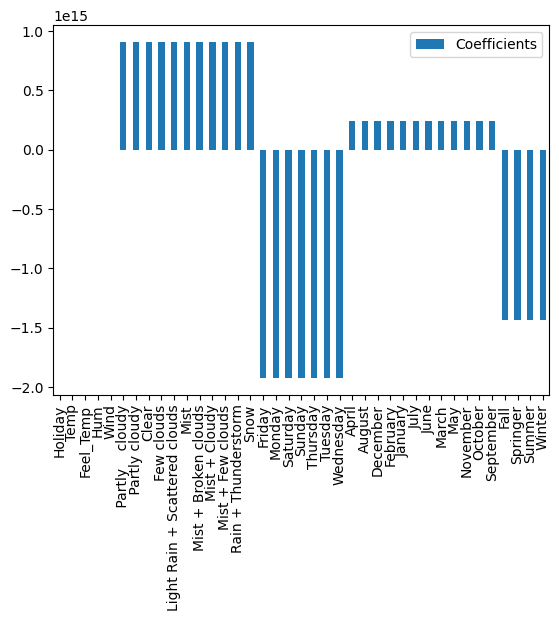

In [18]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
cdf.plot.bar()

In [24]:
cdf

,Coefficients
Holiday,-4.622208e+02
Temp,1.174365e+03
Feel_Temp,-2.178924e+02
Hum,-2.137945e+01
Wind,-1.916575e+02
Partly cloudy,9.095239e+14
Partly cloudy,9.095239e+14
Clear,9.095239e+14
Few clouds,9.095239e+14
Light Rain + Scattered clouds,9.095239e+14


## Describa cual es el escenario ideal para el incremento de usuarios.

Basándose en la respuesta anterior hay que aprovechar los momentos del día cuando el clima es bueno para incentivar a los usuarios a utilizar el servicio, ofreciéndoles un descuento o un sistema de fidelidad  de puntos para los días con climas soleados, y así aprovechar esos momentos con menos excusas, por ejemplo “me voy a mojar”.


## ¿Qué pasos adicionales deberían tener en cuenta para una próxima iteración/mejora del modelo?
Intentaría experimentar con más hiperparametros y tunearlos también experimentaría con otros modelos más complejos que podrían adaptarse mejor a los datos que tenemos. 